In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

**1. Cargar datos**

se utilizo el conjunto de datos de artículos que contine articulos de las materias de .... en un archivo CSV 



In [ ]:
docs= pd.read_csv("https://raw.githubusercontent.com/DayBS/Machine-learning/main/2do-dataset/train.csv")
docs.head(5)


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Limpieza de datos**

Para realizar la prediccion solo necesitaremos el texto de cada documento

In [ ]:
docs.columns=docs.columns.str.lower().str.replace(" ","_",regex=True)

In [ ]:
docs.head(5)

,id,abstract,computer_science,mathematics,physics,statistics,analysis_of_pdes,applications,artificial_intelligence,astrophysics_of_galaxies,...,methodology,number_theory,optimization_and_control,representation_theory,robotics,social_and_information_networks,statistics_theory,strongly_correlated_electrons,superconductivity,systems_and_control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   abstract                                      14004 non-null  object
 2   computer_science                              14004 non-null  int64 
 3   mathematics                                   14004 non-null  int64 
 4   physics                                       14004 non-null  int64 
 5   statistics                                    14004 non-null  int64 
 6   analysis_of_pdes                              14004 non-null  int64 
 7   applications                                  14004 non-null  int64 
 8   artificial_intelligence                       14004 non-null  int64 
 9   astrophysics_of_galaxies                      14004 non-null  int64 
 10

In [ ]:

docs = docs.drop(columns=[
'id','computer_science','mathematics','physics','statistics','analysis_of_pdes','applications',  
'artificial_intelligence','astrophysics_of_galaxies','computation_and_language','computer_vision_and_pattern_recognition',   
'cosmology_and_nongalactic_astrophysics','data_structures_and_algorithms','differential_geometry',             
'earth_and_planetary_astrophysics', 'fluid_dynamics', 'information_theory','instrumentation_and_methods_for_astrophysics',  
'machine_learning',          
'materials_science',
'methodology',              
'number_theory',                  
'optimization_and_control',       
'representation_theory',         
'robotics',            
'social_and_information_networks', 
'statistics_theory',                  
'strongly_correlated_electrons',              
'superconductivity',                      
'systems_and_control'                      
 ], axis=1)

docs.head()

,abstract
0,a ever-growing datasets inside observational a...
1,we propose the framework considering optimal $...
2,nanostructures with open shell transition meta...
3,stars are self-gravitating fluids inside which...
4,deep neural perception and control networks ar...


In [ ]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  14004 non-null  object
dtypes: object(1)
memory usage: 109.5+ KB


se realizara un preprocesamiento simple en el contenido del abstract ‎‎para que los resultados del analisis sean mas confiables 
Para hacer eso, se usara una expresión regular para eliminar cualquier puntuación y luego ‎‎pondremos el texto en minúsculas‎‎.‎

In [ ]:
#libreria para usar expresiones regulares
import re
# Eliminar los caracteres como puntos, simbolos de dolar, comas, etc.
docs['docs_procesados'] = \
docs['abstract'].map(lambda x: re.sub('[$,\.!?_]', '', x))
# LLevar las palabras a minusculas
docs['docs_procesados'] = \
docs['docs_procesados'].map(lambda x: x.lower())
# Visualizar la columna de datos procesados
docs.head()


,abstract,docs_procesados
0,a ever-growing datasets inside observational a...,a ever-growing datasets inside observational a...
1,we propose the framework considering optimal $...,we propose the framework considering optimal t...
2,nanostructures with open shell transition meta...,nanostructures with open shell transition meta...
3,stars are self-gravitating fluids inside which...,stars are self-gravitating fluids inside which...
4,deep neural perception and control networks ar...,deep neural perception and control networks ar...


In [ ]:
docs.head()

,abstract,docs_procesados
0,a ever-growing datasets inside observational a...,a ever-growing datasets inside observational a...
1,we propose the framework considering optimal $...,we propose the framework considering optimal t...
2,nanostructures with open shell transition meta...,nanostructures with open shell transition meta...
3,stars are self-gravitating fluids inside which...,stars are self-gravitating fluids inside which...
4,deep neural perception and control networks ar...,deep neural perception and control networks ar...


**3. Analisis Exploratorio**

‎Para verificar  el preprocesamiento, se hara uso de la libreria wordcloud, que nos permite tener una representacion visual de las palabras mas comunes.
nos permite comprender los datos y verificar si no es necesario realizar mas preprocesamiento antes de entrenar el modelo


['a ever-growing datasets inside observational astronomy have challenged scientists inside many aspects including an efficient and interactive data exploration and visualization many tools have been developed to confront this challenge however they usually focus on displaying a actual images or focus on visualizing patterns within catalogs inside the predefined way inside this paper we introduce vizic the python visualization library that builds a connection between images and catalogs through an interactive map of a sky region vizic visualizes catalog data over the custom background canvas with the help of a shape size and orientation of each object inside a catalog a displayed objects inside a map are highly interactive and customizable comparing to those inside a images these objects should be filtered by or colored by their properties such as redshift and magnitude they also should be sub-selected with the help of the lasso-like tool considering further analysis with the help of st

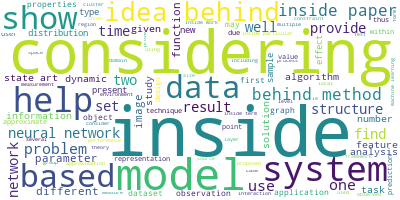

In [ ]:
from wordcloud import WordCloud
#todos los resumenes en una sola lista
print(list(docs['docs_procesados'].values)[:2]) 
long_string = ','.join(list(docs['docs_procesados'].values))
print(long_string[:500])
# crear un objeto de la clase importada
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# generar la nube
wordcloud.generate(long_string)
# visualizar la nube
wordcloud.to_image()

**4. Preparar los datos para el analisis LDA**

*  Primero se eliminan las palabras comunes que poco influyen al momento de tomar una decisión.



*  posteriormente se convertira cada objeto Tokenizado en un corpus y un diccionario



In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#recuperar una lista de palabras de parada del idioma inglés
stop_words = stopwords.words('english')
#se agrega otras que no estan dentro del conjundo de palabras de parada
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def sent_to_words(sentences):
  #recibir una lista de tokens de cada articulo
    for sentence in sentences:
      #usar la herramienta gensim para el procesamiento de los textos de cada articulo,
      #deacc en true para eliminar las puntuaciones
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

#obtener una lista que contenga el contenido de cada articulo
datos = docs.docs_procesados.values.tolist() ##[[articulo 1],[articulo2]]
#obtener las palabras.
palabras_documento= list(sent_to_words(datos))#[['','',''],['','','']]
print(palabras_documento[0:2])

# eliminar las palabras de parada
palabras_documento = remove_stopwords(palabras_documento)
print(palabras_documento[0:2])

#se eliminaran palabras como have,an,and,etc

[['ever', 'growing', 'datasets', 'inside', 'observational', 'astronomy', 'have', 'challenged', 'scientists', 'inside', 'many', 'aspects', 'including', 'an', 'efficient', 'and', 'interactive', 'data', 'exploration', 'and', 'visualization', 'many', 'tools', 'have', 'been', 'developed', 'to', 'confront', 'this', 'challenge', 'however', 'they', 'usually', 'focus', 'on', 'displaying', 'actual', 'images', 'or', 'focus', 'on', 'visualizing', 'patterns', 'within', 'catalogs', 'inside', 'the', 'predefined', 'way', 'inside', 'this', 'paper', 'we', 'introduce', 'vizic', 'the', 'python', 'visualization', 'library', 'that', 'builds', 'connection', 'between', 'images', 'and', 'catalogs', 'through', 'an', 'interactive', 'map', 'of', 'sky', 'region', 'vizic', 'visualizes', 'catalog', 'data', 'over', 'the', 'custom', 'background', 'canvas', 'with', 'the', 'help', 'of', 'shape', 'size', 'and', 'orientation', 'of', 'each', 'object', 'inside', 'catalog', 'displayed', 'objects', 'inside', 'map', 'are', 'hi

In [ ]:
import gensim.corpora as corpora
# creacion del diccionario donde cada palabra fue tokenizada
id2word= corpora.Dictionary(palabras_documento)
print(id2word)

# creacion del copus
texts = palabras_documento
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

Dictionary(38048 unique tokens: ['actual', 'added', 'adopted', 'alignment', 'allows']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 5), (29, 1)]


**Entrenamiento del modelo**

* los parametros alfa y beta seran asignados aleatoreamente

* el numero de temas sera de 4

* usaremos las palabras con el formato requerido por el modelo

** Nota: Cada documento es una combinacion de palabras 

Cada palabra contribuye un peso al tema **




In [ ]:
from pprint import pprint
# establecer el numero de topicos
num_topics = 4
# importar el modelo LDA con los datos,las palabras y el numero de topicos
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# 
pprint(lda_model.print_topics())


[(0,
  '0.035*"inside" + 0.019*"depth" + 0.018*"considering" + '
  '0.011*"reconstruction" + 0.009*"problems" + 0.007*"learning" + '
  '0.007*"results" + 0.007*"contribution" + 0.007*"based" + 0.007*"real"'),
 (1,
  '0.027*"inside" + 0.013*"considering" + 0.009*"system" + 0.009*"exercise" + '
  '0.007*"two" + 0.007*"present" + 0.007*"data" + 0.005*"learning" + '
  '0.005*"method" + 0.005*"methods"'),
 (2,
  '0.029*"inside" + 0.022*"considering" + 0.004*"show" + 0.004*"problem" + '
  '0.004*"also" + 0.004*"two" + 0.004*"depth" + 0.004*"number" + '
  '0.004*"results" + 0.004*"case"'),
 (3,
  '0.039*"inside" + 0.015*"considering" + 0.014*"phase" + 0.014*"order" + '
  '0.013*"wave" + 0.012*"two" + 0.011*"density" + 0.011*"transition" + '
  '0.011*"superconducting" + 0.011*"mathrm"')]


In [ ]:
doc_lda = lda_model[corpus]


In [ ]:
print(doc_lda)

**Analisis de los resultado**

se usara la libreria pyLDAvis, el cual nos permite visualizar los resultados del entrenamiento del modelo 
* analisis de las palabras para cada tema
* analisis de relaciones entre los temas




In [ ]:
##instalacion de pyLDAvis
!pip install pyLDAvis
#!pip install gensim



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

In [ ]:
! touch ldavis_prepared

In [ ]:
#visualizar los temas

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared')

In [ ]:
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)  

LDAvis_prepared   

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.055524 -0.059284       1        1  32.027994
2      0.021769  0.095139       2        1  29.318839
0      0.127922 -0.018423       3        1  22.515068
3     -0.205215 -0.017432       4        1  16.138099, topic_info=                 Term         Freq         Total Category  logprob  loglift
1743            depth  9384.000000   9384.000000  Default  30.0000  30.0000
285             phase  3724.000000   3724.000000  Default  29.0000  29.0000
1641             wave  3441.000000   3441.000000  Default  28.0000  28.0000
686             order  4662.000000   4662.000000  Default  27.0000  27.0000
2915  superconducting  2582.000000   2582.000000  Default  26.0000  26.0000
...               ...          ...           ...      ...      ...      ...
311               two  2729.071882   8974.843587   Topic4  -4.4415   0.6335
467             three  1309.325691   2477.404475   Topic4  -5.1760   1.1863
305           systems  1349.959976   3087.267844   Topic4  -5.1454   0.9968
24        considering  3565.327375  24850.220373   Topic4  -4.1742  -0.1176
446             model  1699.497325   6424.633445   Topic4  -4.9151   0.4942

[366 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2261      1  0.012556  abelian
2261      2  0.941716  abelian
2261      3  0.018834  abelian
2261      4  0.031391  abelian
1466      1  0.231690  acquire
...     ...       ...      ...
5191      4  0.008991     wise
133       1  0.415546     work
133       2  0.137051     work
133       3  0.238961     work
133       4  0.208505     work

[1073 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

**5. Importacion del modelo**

In [ ]:
from gensim.test.utils import datapath

# temp_file = datapath("model")
file_model = "./model"
lda_model.save(file_model)

lda_model_import2 =gensim.models.LdaMulticore.load(file_model) 


In [ ]:
print(lda_model)

LdaModel(num_terms=38048, num_topics=4, decay=0.5, chunksize=2000)


In [ ]:
print(lda_model_import2)

LdaModel(num_terms=38048, num_topics=4, decay=0.5, chunksize=2000)


In [ ]:
def predict_topic(text):
  #importar el modelo entrenado
  lda_model_import =gensim.models.LdaMulticore.load(file_model)
  test_corpus=id2word.doc2bow(text.split())

  return (lda_model_import[test_corpus])


In [ ]:
examples= pd.read_csv("https://raw.githubusercontent.com/DayBS/Machine-learning/main/2do-dataset/test.csv")
examples.head()

examples.columns=examples.columns.str.lower().str.replace(" ","_",regex=True)

examples = examples.drop(columns=[
'id','computer_science','mathematics','physics','statistics'], axis=1)

# Eliminar los caracteres como puntos, simbolos de dolar, comas, etc.
examples['docs_procesados'] = \
examples['abstract'].map(lambda x: re.sub('[$,\.!?_]', '', x))
# LLevar las palabras a minusculas
examples['docs_procesados'] = \
examples['docs_procesados'].map(lambda x: x.lower())
# Visualizar la columna de datos procesados



In [ ]:
examples.docs_procesados[64]

'inside this paper we exploit the memory-augmented neural network to predict accurate answers to visual questions even when those answers occur rarely inside a training set a memory network incorporates both internal and external memory blocks and selectively pays attention to each training exemplar we show that memory-augmented neural networks are able to maintain the relatively long-term memory of scarce training exemplars which was important considering visual question answering due to a heavy-tailed distribution of answers inside the general vqa setting experimental results on two large-scale benchmark datasets show a favorable performance of a proposed algorithm with the comparison to state of a art'

In [ ]:
text="inside this paper we exploit the memory-augmented neural network to predict accurate answers to visual questions even when those answers occur rarely inside a training set a memory network incorporates both internal and external memory blocks and selectively pays attention to each training exemplar we show that memory-augmented neural networks are able to maintain the relatively long-term memory of scarce training exemplars which was important considering visual question answering due to a heavy-tailed distribution of answers inside the general vqa setting experimental results on two large-scale benchmark datasets show a favorable performance of a proposed algorithm with the comparison to state of a art"

predict_topic(text)

[(0, 0.8119087), (1, 0.17961943)]

In [ ]:
! pip install fitz
!pip install PyMuPDF

In [ ]:
import cv2
import glob
import os
import fitz

In [ ]:
def obtener_lista_archivos(ruta):
    archivos_pdf=glob.glob(ruta+"/*.pdf")
    return archivos_pdf

In [ ]:
obtener_lista_archivos("/content/sample_data")

['/content/sample_data/procedimiento.pdf']

In [ ]:
def leer_contenido_pdf(ruta_pdf):
    documento=fitz.open(ruta_pdf)
    pagina=documento.load_page(0)
    contenido=pagina.get_text("text")
    return contenido

In [ ]:
leer_contenido_pdf("/content/sample_data/procedimiento.pdf") 

'1.\ninstalar conda(explicar que hace, porque es necesario)\n2.\nobtener el dataset(internet, videos de simulaciones)\n3.\nvariar las imágenes del dataset(blanco y negro, cerca, lejos, angulos)\n4.\npre procesamiento(normalizar el tamaño)\n5.\netiquetado(herramientas, formato coco)\n6.\nimportación de los datos\n7.\nentrenamiento\n8.\npruebas\n9.\nimplementacion real\nnota:instalar torch para cpu\n'

In [ ]:
def maximo(lista_tuplas):
  maximo= lista_tuplas[0][1]
  posicion_maximo=0
  for i in range(1,4):
    if(lista_tuplas[i][1]>maximo):
      maximo=lista_tuplas[i][1]
      print(maximo)
      posicion_maximo=i
  return i


In [ ]:
def predecir_carpeta(contenido):
    lista_probabilidades=predict_topic(contenido)
    topico=maximo(lista_tuplas=lista_probabilidades)
    return topico

In [ ]:
predecir_carpeta("1.\ninstalar conda(explicar que hace, porque es necesario)\n2.\nobtener el dataset(internet, videos de simulaciones)\n3.\nvariar las imágenes del dataset(blanco y negro, cerca, lejos, angulos)\n4.\npre procesamiento(normalizar el tamaño)\n5.\netiquetado(herramientas, formato coco)\n6.\nimportación de los datos\n7.\nentrenamiento\n8.\npruebas\n9.\nimplementacion real\nnota:instalar torch para cpu\n")

<class 'list'>
0.48659873


3

In [ ]:
def asignar_carpeta(ruta,archivo,carpeta):
    ruta_archivo=archivo
    ruta_destino=ruta+"/"+str(carpeta)

    if not(os.path.isdir(ruta_destino)):
        print("no deberia")
        os.system("mkdir "+ruta_destino)
    print("mv "+ruta_archivo+" "+ruta_destino)
    os.system("mv "+ruta_archivo+" "+ruta_destino)

In [ ]:
def ordenar_documentos(ruta):
    lista_pdfs=obtener_lista_archivos(ruta)
    for ruta_pdf in lista_pdfs:
        texto=leer_contenido_pdf(ruta_pdf)
        carpeta_destino=predecir_carpeta(texto)
        print(texto)
        print(carpeta_destino)
        asignar_carpeta(ruta,ruta_pdf,carpeta_destino)

In [ ]:
ordenar_documentos("/content/sample_data")

0.48658124
1.
instalar conda(explicar que hace, porque es necesario)
2.
obtener el dataset(internet, videos de simulaciones)
3.
variar las imágenes del dataset(blanco y negro, cerca, lejos, angulos)
4.
pre procesamiento(normalizar el tamaño)
5.
etiquetado(herramientas, formato coco)
6.
importación de los datos
7.
entrenamiento
8.
pruebas
9.
implementacion real
nota:instalar torch para cpu

3
mv /content/sample_data/procedimiento.pdf /content/sample_data/3


In [ ]:
!pip install googletrans==3.1.0a0 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
trans=Translator();

In [ ]:
#traduccion
df['esp'] = df.apply(lambda row: trans.translate(row["docs_procesados"],dest="es").text , axis = 1) 
df.to_csv("train_traducido.csv") 

**1. Cargar datos**

se utilizo el conjunto de datos de artículos que contine articulos de las materias de .... en un archivo CSV 

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/DayBS/Machine-learning/main/2do-dataset/train.csv")

df.columns=df.columns.str.lower().str.replace(" ","_",regex=True)
df = df.drop(columns=[
'id','computer_science','mathematics','physics','statistics','analysis_of_pdes','applications',  
'artificial_intelligence','astrophysics_of_galaxies','computation_and_language','computer_vision_and_pattern_recognition',   
'cosmology_and_nongalactic_astrophysics','data_structures_and_algorithms','differential_geometry',             
'earth_and_planetary_astrophysics', 'fluid_dynamics', 'information_theory','instrumentation_and_methods_for_astrophysics',  
'machine_learning',          
'materials_science',
'methodology',              
'number_theory',                  
'optimization_and_control',       
'representation_theory',         
'robotics',            
'social_and_information_networks', 
'statistics_theory',                  
'strongly_correlated_electrons',              
'superconductivity',                      
'systems_and_control'                      
 ], axis=1)

#libreria para usar expresiones regulares
import re
# Eliminar los caracteres como puntos, simbolos de dolar, comas, etc.
df['docs_procesados'] = \
df['abstract'].map(lambda x: re.sub('[$,\.!?_]', '', x))
# LLevar las palabras a minusculas
df['docs_procesados'] = \
df['docs_procesados'].map(lambda x: x.lower())
# Visualizar la columna de datos procesados

df=df.drop("abstract",axis=1)

**2. Limpieza de datos**

Para realizar la prediccion solo necesitaremos el texto de cada documento

In [ ]:
df['esp'] = df.apply(lambda row: trans.translate(row["docs_procesados"],dest="es").text , axis = 1)  

In [ ]:
df.head(100)      

In [ ]:
documentos= pd.read_csv("train_traducido.csv")
documentos.head(5)

,Unnamed: 0,docs_procesados,esp
0,0,a ever-growing datasets inside observational a...,Los conjuntos de datos en constante crecimient...
1,1,we propose the framework considering optimal t...,Proponemos el marco que considera coincidencia...
2,2,nanostructures with open shell transition meta...,Las nanoestructuras con componentes moleculare...
3,3,stars are self-gravitating fluids inside which...,las estrellas son fluidos autogravitatorios de...
4,4,deep neural perception and control networks ar...,Es probable que las redes de control y percepc...


In [ ]:
documentos = documentos.drop(columns=["docs_procesados","Unnamed: 0"], axis=1)
documentos.head(5)

**3. Preparar los datos para el analisis LDA**

Primero se eliminan las palabras comunes que poco influyen al momento de tomar una decisión.
posteriormente se convertira cada objeto Tokenizado en un corpus y un diccionario

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
#recuperar una lista de palabras de parada del idioma español
stop_words = stopwords.words('spanish')
#se agrega otras que no estan dentro del conjundo de palabras de parada
stop_words.extend(['dentro','afuera','lejos','considerando','si','no','talvez','mas','menos','uno','dos','tres','cuatro','cinco','tambien'])
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
def sent_to_words(sentences):
  #recibir una lista de tokens de cada articulo
    for sentence in sentences:
      #usar la herramienta gensim para el procesamiento de los textos de cada articulo,
      #deacc en true para eliminar las puntuaciones
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

#obtener una lista que contenga el contenido de cada articulo
datos = documentos.esp.values.tolist() ##[[articulo 1],[articulo2]]
#obtener las palabras.
palabras_documento= list(sent_to_words(datos))#[['','',''],['','','']]
print(palabras_documento[0:2])

# eliminar las palabras de parada
palabras_documento = remove_stopwords(palabras_documento)
print(palabras_documento[0:2])

#se eliminaran palabras como have,an,and,etc

[['los', 'conjuntos', 'de', 'datos', 'en', 'constante', 'crecimiento', 'dentro', 'de', 'la', 'astronomia', 'observacional', 'han', 'desafiado', 'los', 'cientificos', 'en', 'muchos', 'aspectos', 'incluida', 'una', 'exploracion', 'visualizacion', 'de', 'datos', 'eficiente', 'interactiva', 'se', 'han', 'desarrollado', 'muchas', 'herramientas', 'para', 'enfrentar', 'este', 'desafio', 'sin', 'embargo', 'generalmente', 'se', 'enfocan', 'en', 'mostrar', 'imagenes', 'reales', 'en', 'visualizar', 'patrones', 'dentro', 'de', 'catalogos', 'dentro', 'del', 'forma', 'predefinida', 'dentro', 'de', 'este', 'documento', 'presentamos', 'vizic', 'la', 'biblioteca', 'de', 'visualizacion', 'de', 'python', 'que', 'construye', 'una', 'conexion', 'entre', 'imagenes', 'catalogos', 'traves', 'de', 'un', 'mapa', 'interactivo', 'de', 'una', 'region', 'del', 'cielo', 'vizic', 'visualiza', 'los', 'datos', 'del', 'catalogo', 'sobre', 'el', 'lienzo', 'de', 'fondo', 'personalizado', 'con', 'la', 'ayuda', 'del', 'tama

In [ ]:
import gensim.corpora as corpora
# creacion del diccionario donde cada palabra fue tokenizada
id2word= corpora.Dictionary(palabras_documento)
print(id2word)

# creacion del copus
texts = palabras_documento
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

Dictionary(46433 unique tokens: ['ademas', 'adoptarse', 'agregar', 'agregarse', 'agrupamiento']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


**4. Entrenamiento del modelo**

los parametros alfa y beta seran asignados aleatoreamente

el numero de temas sera de 4

usaremos las palabras con el formato requerido por el modelo

** Nota: Cada documento es una combinacion de palabras

Cada palabra contribuye un peso al tema **

In [ ]:
from pprint import pprint
# establecer el numero de topicos
num_topics = 4
# importar el modelo LDA con los datos,las palabras y el numero de topicos
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# 
pprint(lda_model.print_topics())

[(0,
  '0.011*"orden" + 0.010*"datos" + 0.010*"carga" + 0.008*"modelo" + '
  '0.008*"mathrm" + 0.008*"fase" + 0.008*"onda" + 0.007*"densidad" + '
  '0.007*"sistema" + 0.007*"modo"'),
 (1,
  '0.008*"sistema" + 0.008*"datos" + 0.005*"modelo" + 0.005*"resultados" + '
  '0.004*"aprendizaje" + 0.004*"onda" + 0.004*"trabajo" + 0.004*"densidad" + '
  '0.004*"sistemas" + 0.004*"presentamos"'),
 (2,
  '0.022*"profundidad" + 0.013*"reconstruccion" + 0.009*"problemas" + '
  '0.009*"contribucion" + 0.008*"robot" + 0.007*"entorno" + 0.007*"resultados" '
  '+ 0.007*"solo" + 0.007*"algoritmos" + 0.007*"conjunto"'),
 (3,
  '0.008*"fase" + 0.008*"onda" + 0.007*"transicion" + 0.007*"orden" + '
  '0.007*"ge" + 0.005*"mathrm" + 0.005*"modo" + 0.005*"densidad" + '
  '0.004*"dramatico" + 0.004*"datos"')]


**5. Analisis de los resultado**

se usara la libreria pyLDAvis, el cual nos permite visualizar los resultados del entrenamiento del modelo

analisis de las palabras para cada tema
analisis de relaciones entre los temas

In [ ]:
!pip install pyLDAvis 

In [ ]:
! touch ldavis_prepared
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared') 

In [ ]:
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)   
           
LDAvis_prepared    

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.040576  0.058032       1        1  42.676249
3      0.082854 -0.016159       2        1  31.592912
2     -0.124030  0.007949       3        1  18.762909
0      0.000601 -0.049822       4        1   6.967929, topic_info=                 Term         Freq        Total Category  logprob  loglift
1829      profundidad  6242.000000  6242.000000  Default  30.0000  30.0000
3266   reconstruccion  3803.000000  3803.000000  Default  29.0000  29.0000
453             orden  5066.000000  5066.000000  Default  28.0000  28.0000
259              fase  4692.000000  4692.000000  Default  27.0000  27.0000
2876           mathrm  3321.000000  3321.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
579       aprendizaje   360.648798  4929.708013   Topic4  -5.5482   0.0487
21351            nbse   308.705568  2227.616834   Topic4  -5.7037   0.6876
106       presentamos   324.755776  3472.305814   Topic4  -5.6530   0.2944
1199     transiciones   298.477941  2187.413562   Topic4  -5.7374   0.6721
186         problemas   315.275588  3519.650159   Topic4  -5.6827   0.2512

[350 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
17676      1  0.076929       abc
17676      2  0.307715       abc
17676      3  0.153857       abc
17676      4  0.461572       abc
2849       1  0.878977  acrecion
...      ...       ...       ...
16583      1  0.242235       wer
16583      3  0.242235       wer
16583      4  0.484470       wer
44954      1  0.940310       wjs
44954      2  0.042741       wjs

[926 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

**6. exportacion del modelo**

In [ ]:
from gensim.test.utils import datapath     

# temp_file = datapath("model")
file_model = "./modelo_entrenado"
lda_model.save(file_model) 

**importacion del modelo**


In [ ]:
modelo_entrenado_importado =gensim.models.LdaMulticore.load("./modelo_entrenado") 
print(modelo_entrenado_importado)

LdaModel(num_terms=46433, num_topics=4, decay=0.5, chunksize=2000)


In [ ]:
examples= pd.read_csv("https://raw.githubusercontent.com/DayBS/Machine-learning/main/2do-dataset/test.csv")
examples=examples[0:1000]

examples.columns=examples.columns.str.lower().str.replace(" ","_",regex=True)

examples = examples.drop(columns=[
'id','computer_science','mathematics','physics','statistics'], axis=1)

# Eliminar los caracteres como puntos, simbolos de dolar, comas, etc.
examples['docs_procesados'] = \
examples['abstract'].map(lambda x: re.sub('[$,\.!?_]', '', x))
# LLevar las palabras a minusculas
examples['docs_procesados'] = \
examples['docs_procesados'].map(lambda x: x.lower())
# Visualizar la columna de datos procesados

In [ ]:
examples['esp'] = examples.apply(lambda row: trans.translate(row["docs_procesados"],dest="es").text , axis = 1)
examples.head(100)

,abstract,docs_procesados,esp
0,fundamental frequency (f0) approximation from ...,fundamental frequency (f0) approximation from ...,La aproximación de la frecuencia fundamental (...
1,"this large-scale study, consisting of 24.5 mil...",this large-scale study consisting of 245 milli...,este estudio a gran escala que consta de 245 m...
2,we present a stability analysis of the plane c...,we present a stability analysis of the plane c...,presentamos un análisis de estabilidad del flu...
3,we construct finite time blow-up solutions to ...,we construct finite time blow-up solutions to ...,construimos soluciones ampliadas en tiempo fin...
4,planetary nebulae (pne) constitute an importan...,planetary nebulae (pne) constitute an importan...,Las nebulosas planetarias (pne) constituyen un...
...,...,...,...
95,we present a highest spatial resolution alma o...,we present a highest spatial resolution alma o...,presentamos las observaciones de alma de resol...
96,complex systems should be modelled at various ...,complex systems should be modelled at various ...,los sistemas complejos deben ser modelados en ...
97,this paper was concerned with the discrete-tim...,this paper was concerned with the discrete-tim...,Este documento se ocupó del problema de contro...
98,it was the great pleasure to be invited to joi...,it was the great pleasure to be invited to joi...,fue un gran placer ser invitado a unirme a un ...


In [ ]:
examples=examples.drop(columns=['abstract','docs_procesados'],axis=1)
examples.head(50)

,esp
0,La aproximación de la frecuencia fundamental (...
1,este estudio a gran escala que consta de 245 m...
2,presentamos un análisis de estabilidad del flu...
3,construimos soluciones ampliadas en tiempo fin...
4,Las nebulosas planetarias (pne) constituyen un...
5,Con avances recientes dentro de la inteligenci...
6,Los métodos de optimización basados ​​en model...
7,"Dentro de un trabajo actual, se ha propuesto e..."
8,estudiamos un problema de detección de comunid...
9,Las nanocintas de grafeno (gnrs) son tiras ult...


In [ ]:
examples.to_csv("test_traducido.csv")   


In [ ]:
examples.docs_procesados[64]

'inside this paper we exploit the memory-augmented neural network to predict accurate answers to visual questions even when those answers occur rarely inside a training set a memory network incorporates both internal and external memory blocks and selectively pays attention to each training exemplar we show that memory-augmented neural networks are able to maintain the relatively long-term memory of scarce training exemplars which was important considering visual question answering due to a heavy-tailed distribution of answers inside the general vqa setting experimental results on two large-scale benchmark datasets show a favorable performance of a proposed algorithm with the comparison to state of a art'

In [ ]:
#text="inside this paper we exploit the memory-augmented neural network to predict accurate answers to visual questions even when those answers occur rarely inside a training set a memory network incorporates both internal and external memory blocks and selectively pays attention to each training exemplar we show that memory-augmented neural networks are able to maintain the relatively long-term memory of scarce training exemplars which was important considering visual question answering due to a heavy-tailed distribution of answers inside the general vqa setting experimental results on two large-scale benchmark datasets show a favorable performance of a proposed algorithm with the comparison to state of a art"
text="se trata de un sistema inteligente con capacidad de entender el habla común, pero requiere de cientos a miles de datos para poder realizar la tarea de aprendizaje del modelo"
predict_topic(text)

[(0, 0.01660751), (1, 0.9501216), (2, 0.016799115), (3, 0.01647181)]

In [ ]:
! pip install fitz
!pip install PyMuPDF

**Implementacion del modelo para la organizacion de documentos**

In [ ]:
import cv2
import glob
import os
import fitz

def obtener_lista_archivos(ruta):
    archivos_pdf=glob.glob(ruta+"/*.pdf")
    return archivos_pdf

def leer_contenido_pdf(ruta_pdf):
    documento=fitz.open(ruta_pdf)
    pagina=documento.load_page(0)
    contenido=pagina.get_text("text")
    return contenido


def maximo(lista_tuplas):
  print(lista_tuplas)
  maximo= lista_tuplas[0][1]
  posicion_maximo=0
  for i in range(1,4):
    if(lista_tuplas[i][1]>maximo):
      maximo=lista_tuplas[i][1]
      print(maximo)
      posicion_maximo=i
      
  return posicion_maximo

def predecir_carpeta(contenido):
    lista_probabilidades=predict_topic(contenido)
    topico=maximo(lista_tuplas=lista_probabilidades)
    return topico
 
def asignar_carpeta(ruta,archivo,carpeta):
    ruta_archivo=archivo
    ruta_destino=ruta+str(carpeta)

    if not(os.path.isdir(ruta_destino)):
        print("no deberia")
        os.system("mkdir "+ruta_destino)
    print("mv "+"'"+ruta_archivo+"'"+" "+ruta_destino)
    os.system("mv "+ruta_archivo+" "+ruta_destino)


def ordenar_documentos(ruta):
    lista_pdfs=obtener_lista_archivos(ruta)
    for ruta_pdf in lista_pdfs:
        texto=leer_contenido_pdf(ruta_pdf)
        carpeta_destino=predecir_carpeta(texto)
        print(texto)
        print(carpeta_destino)
        asignar_carpeta(ruta,ruta_pdf,carpeta_destino)

ordenar_documentos("/content/carpeta/")